<a href="https://colab.research.google.com/github/kjyothiswaroop/SHALA2020/blob/master/KJS_Clustering_ML_Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Clustering Assignment
* The following note book explores a non labeled data set containing customer data acquired through a membership card. We apply various clustering methods to form clusters of customers and extract useful dala from them.
The link to the data is https://github.com/shala2020/shala2020.github.io/blob/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv


In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans,hierarchical,DBSCAN,AgglomerativeClustering
from sklearn.model_selection import train_test_split


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.hierarchical module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
customer_df = pd.read_csv('https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L9/assignment_shala_clustering.csv')

In [0]:
#Have a look at the various columns of the Data frame
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
#Check for any missing data points
customer_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [0]:
customer_df.drop('CustomerID',axis=1,inplace=True)

In [0]:
customer_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9441b77160>,
      dtype=object)

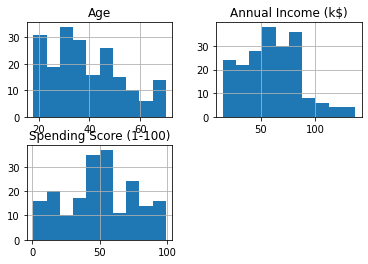

In [0]:
customer_df.hist()

In [0]:
customer_df['Gender'] = np.where(customer_df['Gender']=='Male',1,0)

In [0]:
customer_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


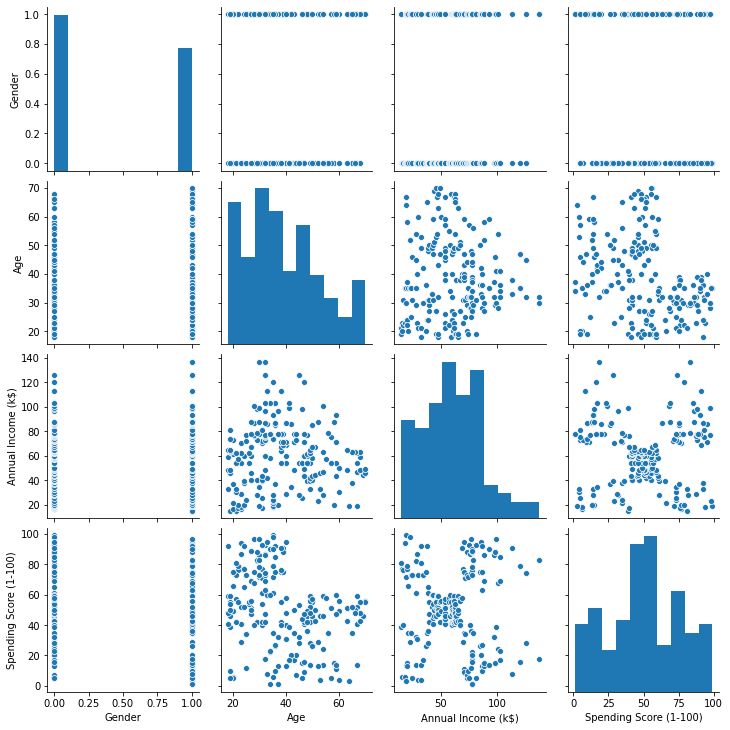

In [0]:
import seaborn as sns
sns.pairplot(customer_df)

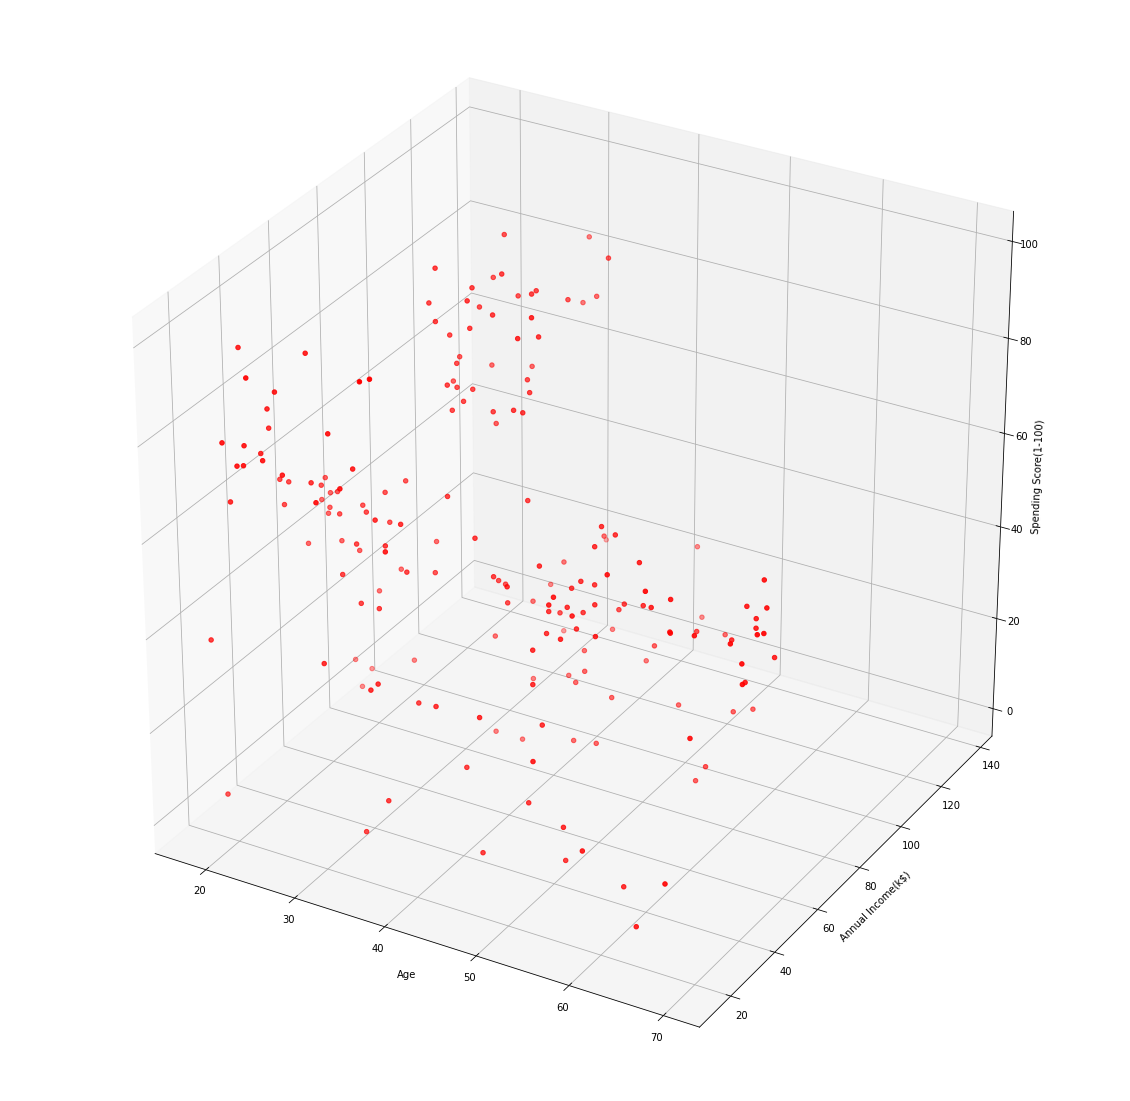

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
x = customer_df['Age']
y = customer_df['Annual Income (k$)']
z = customer_df['Spending Score (1-100)']
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income(k$)')
ax.set_zlabel('Spending Score(1-100)')

plt.show()

In [0]:
X = customer_df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [0]:
X_train,X_new = train_test_split(X,test_size=0.2,random_state = 111)

In [0]:
kmeans = KMeans(n_clusters = 5)
y_pred = kmeans.fit_predict(X_train)

Text(0.5, 0, 'Spending Score(1-100)')

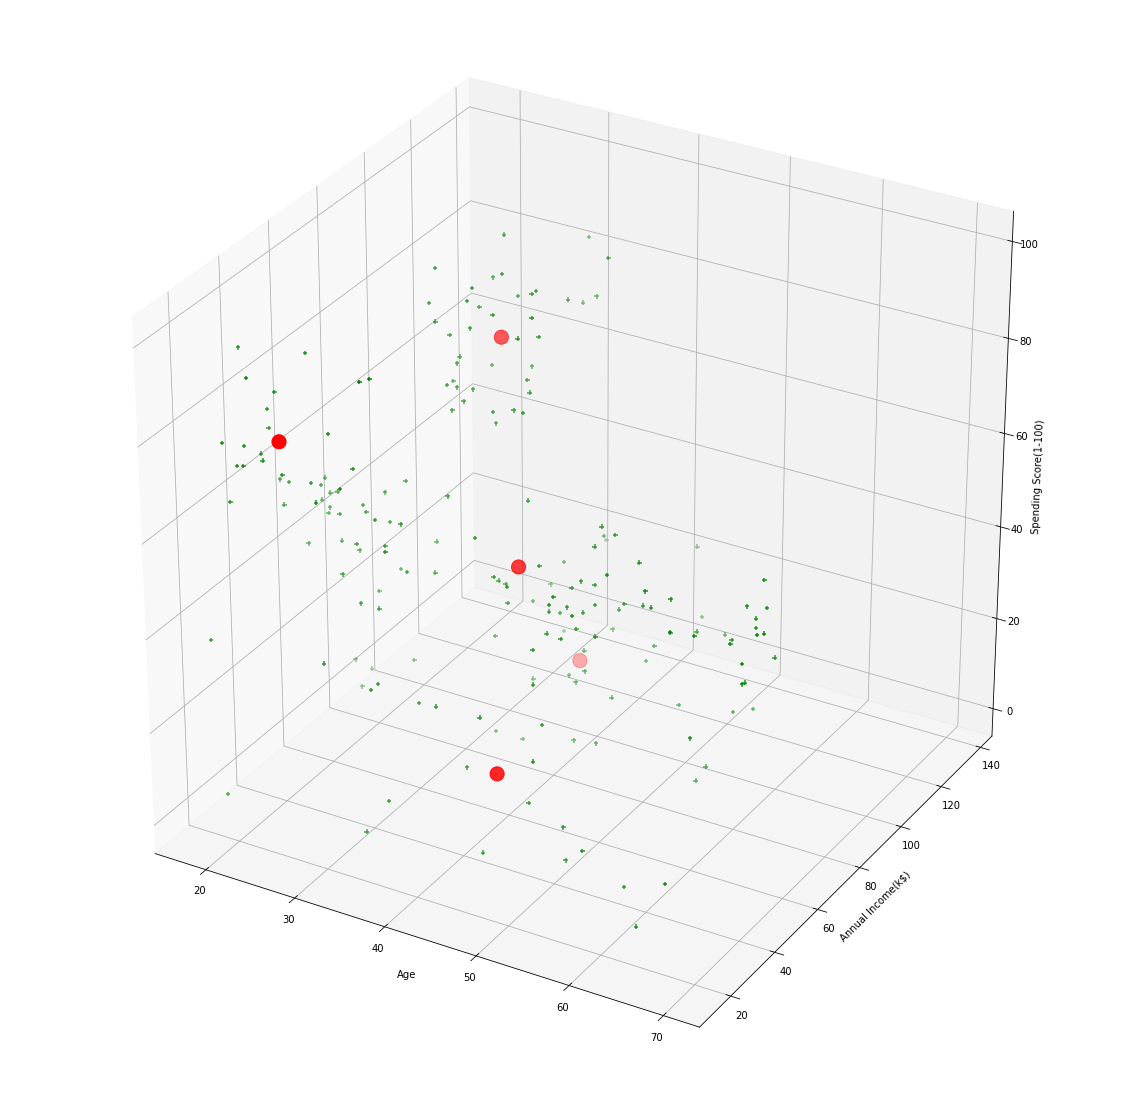

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
x = customer_df['Age']
y = customer_df['Annual Income (k$)']
z = customer_df['Spending Score (1-100)']
ax.scatter(x, y, z, c='g', marker='+')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:,2] ,s=200, c='red',marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income(k$)')
ax.set_zlabel('Spending Score(1-100)')


In [0]:
y_pred[:10]

array([3, 4, 2, 0, 4, 3, 0, 2, 4, 0], dtype=int32)

In [0]:
kmeans.predict(X_new)

array([3, 0, 0, 1, 2, 3, 1, 0, 1, 3, 3, 3, 3, 2, 2, 0, 3, 0, 2, 1, 0, 0,
       1, 0, 0, 0, 0, 3, 2, 1, 2, 0, 0, 0, 0, 1, 4, 0, 4, 4], dtype=int32)

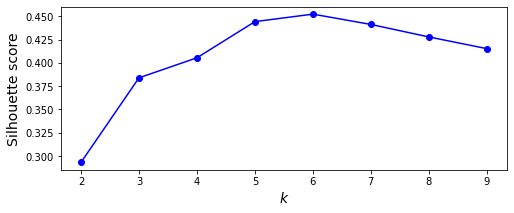

In [0]:
from sklearn.metrics import silhouette_score
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_models[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

Text(0.5, 0, 'Spending Score(1-100)')

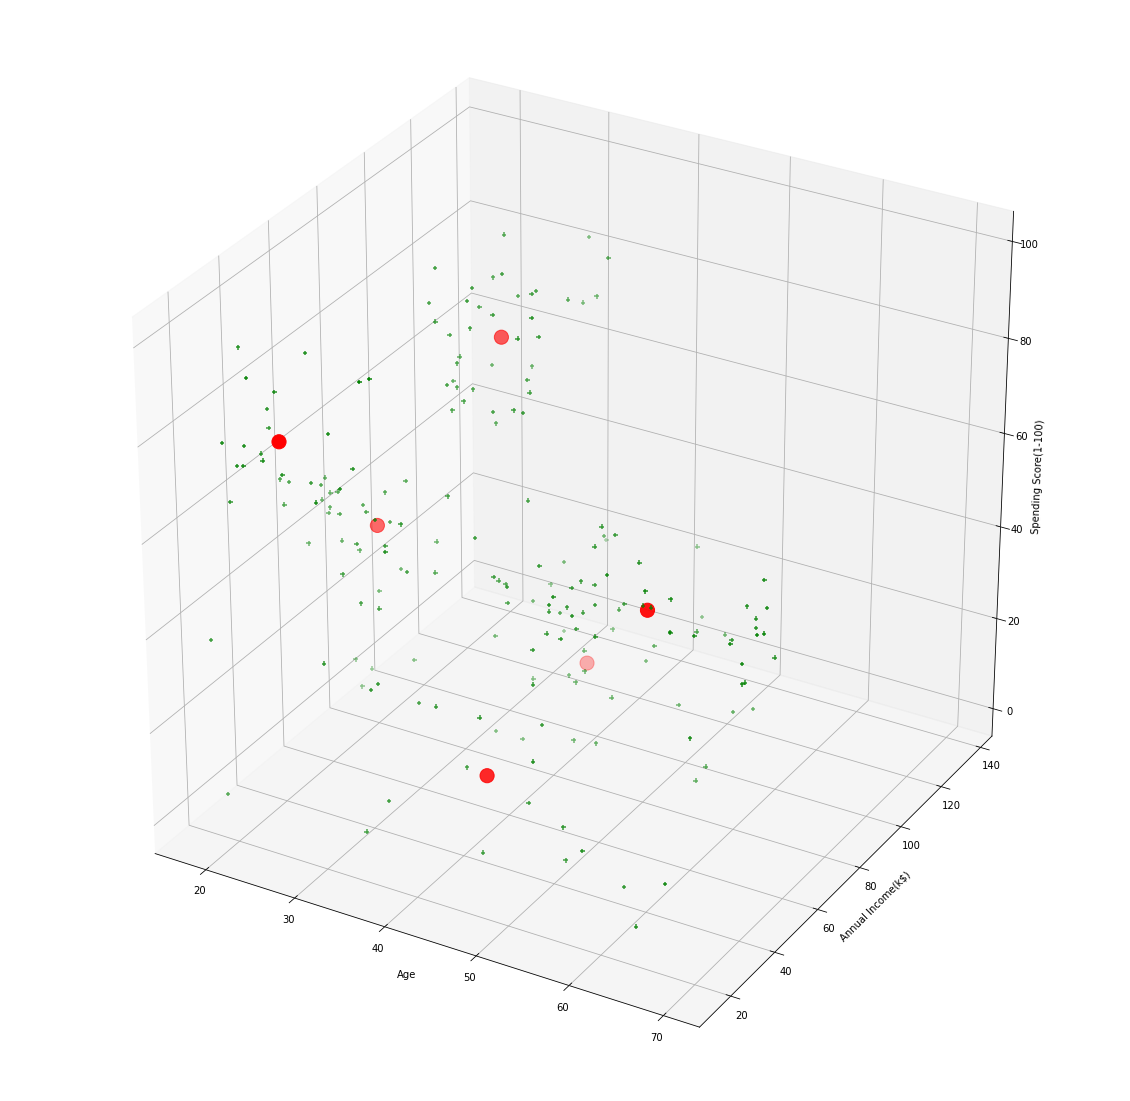

In [0]:
kmeans = KMeans(n_clusters = 6)
y_pred = kmeans.fit_predict(X_train)
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
x = customer_df['Age']
y = customer_df['Annual Income (k$)']
z = customer_df['Spending Score (1-100)']
ax.scatter(x, y, z, c='g', marker='+')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],kmeans.cluster_centers_[:,2] ,s=200, c='red',marker='o')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income(k$)')
ax.set_zlabel('Spending Score(1-100)')